# Data Exploration
## Table of contents<a name=contents></a>
1. [Packages](#packages)
2. [Dataset exploration](#dataset)
    1. [Methods](#methods)
    2. [Categories exploration](#cat)
3. [Data cleaning](#cleaning)
    1. [Raw -> Sents/Words](#r_sw)
4. [Entities in crude industry](#crude_entities)


## 1. Packages <a name=packages></a>

In [118]:
#import nltk
#nltk.download('reuters')
from nltk.corpus import reuters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import regex as re
import spacy
from spacy import displacy

Back to the [table of contents](#contents).

## 2. Dataset exploration <a name=dataset></a>
### 1. Methods <a name=methods></a>

In [2]:
files = reuters.fileids()
len(files)

10788

In [3]:
cat = reuters.categories()
len(cat)

90

In [4]:
print(reuters.categories("test/14826"))
print(reuters.categories(["test/14826","training/9865"]))

['trade']
['barley', 'corn', 'grain', 'trade', 'wheat']


In [5]:
print(reuters.fileids("barley"))

['test/15618', 'test/15649', 'test/15676', 'test/15728', 'test/15871', 'test/15875', 'test/15952', 'test/17767', 'test/17769', 'test/18024', 'test/18263', 'test/18908', 'test/19275', 'test/19668', 'training/10175', 'training/1067', 'training/11208', 'training/11316', 'training/11885', 'training/12428', 'training/13099', 'training/13744', 'training/13795', 'training/13852', 'training/13856', 'training/1652', 'training/1970', 'training/2044', 'training/2171', 'training/2172', 'training/2191', 'training/2217', 'training/2232', 'training/3132', 'training/3324', 'training/395', 'training/4280', 'training/4296', 'training/5', 'training/501', 'training/5467', 'training/5610', 'training/5640', 'training/6626', 'training/7205', 'training/7579', 'training/8213', 'training/8257', 'training/8759', 'training/9865', 'training/9958']


In [6]:
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [7]:
reuters.words(categories='barley')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [8]:
len(reuters.sents(categories='barley'))

319

In [9]:
len(reuters.sents(fileids='test/15618'))

4

In [10]:
reuters.sents(categories='barley')[0]
# List of words contained in the sentence as strings.
#The title seems to be merged with the next sentence (I guess because of the absence of punctuation)

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export',
 '320',
 ',',
 '000',
 'tonnes',
 'of',
 'free',
 'market',
 'barley',
 ',',
 '225',
 ',',
 '000',
 'tonnes',
 'of',
 'maize',
 ',',
 '25',
 ',',
 '000',
 'tonnes',
 'of',
 'free',
 'market',
 'bread',
 '-',
 'making',
 'wheat',
 'and',
 '20',
 ',',
 '000',
 'tonnes',
 'of',
 'feed',
 'wheat',
 'at',
 'today',
 "'",
 's',
 'EC',
 'tender',
 ',',
 'trade',
 'sources',
 'said',
 '.']

In [11]:
len(reuters.words(fileids='test/15618'))

176

In [12]:
reuters.paras(fileids='test/15649')

[[['EC', 'AUTHORISES', 'EXPORT', '65', ',', '000', 'TONNES', 'BARLEY', ',', 'MAXIMUM', 'REBATE', '138', '.', '75', 'ECUS', '-', 'BRUSSELS', 'TRADE']], [['EC', 'AUTHORISES', 'EXPORT', '65', ',', '000', 'TONNES', 'BARLEY', ',', 'MAXIMUM', 'REBATE', '138', '.', '75', 'ECUS', '-', 'BRUSSELS', 'TRADE']]]

In [13]:
len(reuters.words(fileids='test/15649'))

36

Back to the [table of contents](#contents).

### 2. Categories exploration <a name=cat></a>

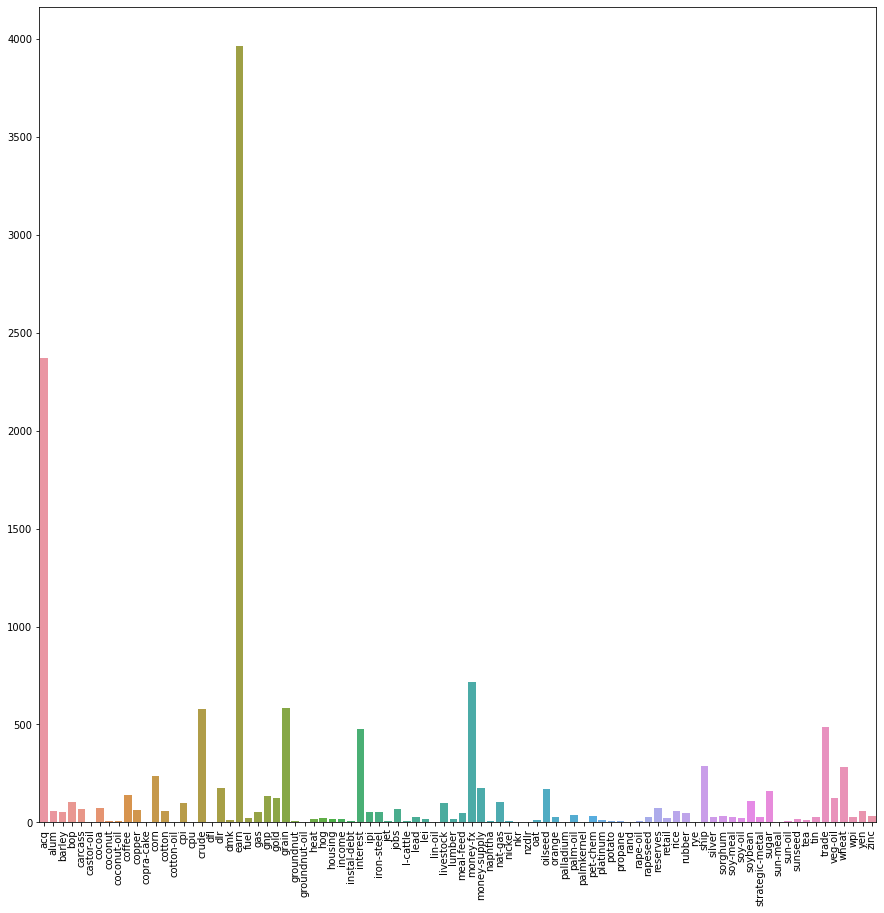

,files_count
count,90.000000
mean,148.088889
std,491.836998
min,2.000000
25%,8.000000
50%,29.000000
75%,91.000000
max,3964.000000


In [14]:
files_count = []
for categorie in cat:
    files_count.append(len(reuters.fileids(categorie)))
files_count = pd.DataFrame({"files_count":files_count},index=cat)#,columns=["categories","files_count"])
fig = plt.figure(figsize = (15,15))
ax = sns.barplot(data=files_count.T)
ax.tick_params(axis='x', rotation=90)
plt.show()
files_count.describe()

In [15]:
files_count.loc[categorie]

files_count    34
Name: zinc, dtype: int64

In [16]:
articles_length = pd.DataFrame()
max_files_count = files_count["files_count"].max()
for categorie in cat:
    length = []
    for file in reuters.fileids(categorie):
        length.append(len(reuters.words(file)))
    articles_length[categorie] = pd.Series(length+list(np.full((max_files_count-files_count.loc[categorie]),np.nan)))
articles_length

,acq,alum,barley,bop,carcass,castor-oil,cocoa,coconut,coconut-oil,coffee,...,sun-oil,sunseed,tea,tin,trade,veg-oil,wheat,wpi,yen,zinc
0,811.0,110.0,176.0,519.0,589.0,290.0,328.0,816.0,816.0,445.0,...,137.0,819.0,123.0,184.0,899.0,182.0,64.0,392.0,115.0,128.0
1,326.0,254.0,36.0,144.0,611.0,98.0,156.0,314.0,532.0,111.0,...,532.0,184.0,117.0,116.0,184.0,445.0,819.0,281.0,212.0,37.0
2,141.0,113.0,68.0,198.0,117.0,NaN,198.0,86.0,293.0,109.0,...,70.0,90.0,290.0,125.0,589.0,296.0,217.0,303.0,114.0,373.0
3,317.0,116.0,145.0,30.0,316.0,NaN,61.0,202.0,701.0,202.0,...,109.0,275.0,193.0,210.0,519.0,122.0,113.0,114.0,437.0,377.0
4,233.0,125.0,3168.0,127.0,73.0,NaN,110.0,103.0,627.0,67.0,...,388.0,95.0,862.0,198.0,233.0,137.0,118.0,38.0,212.0,319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


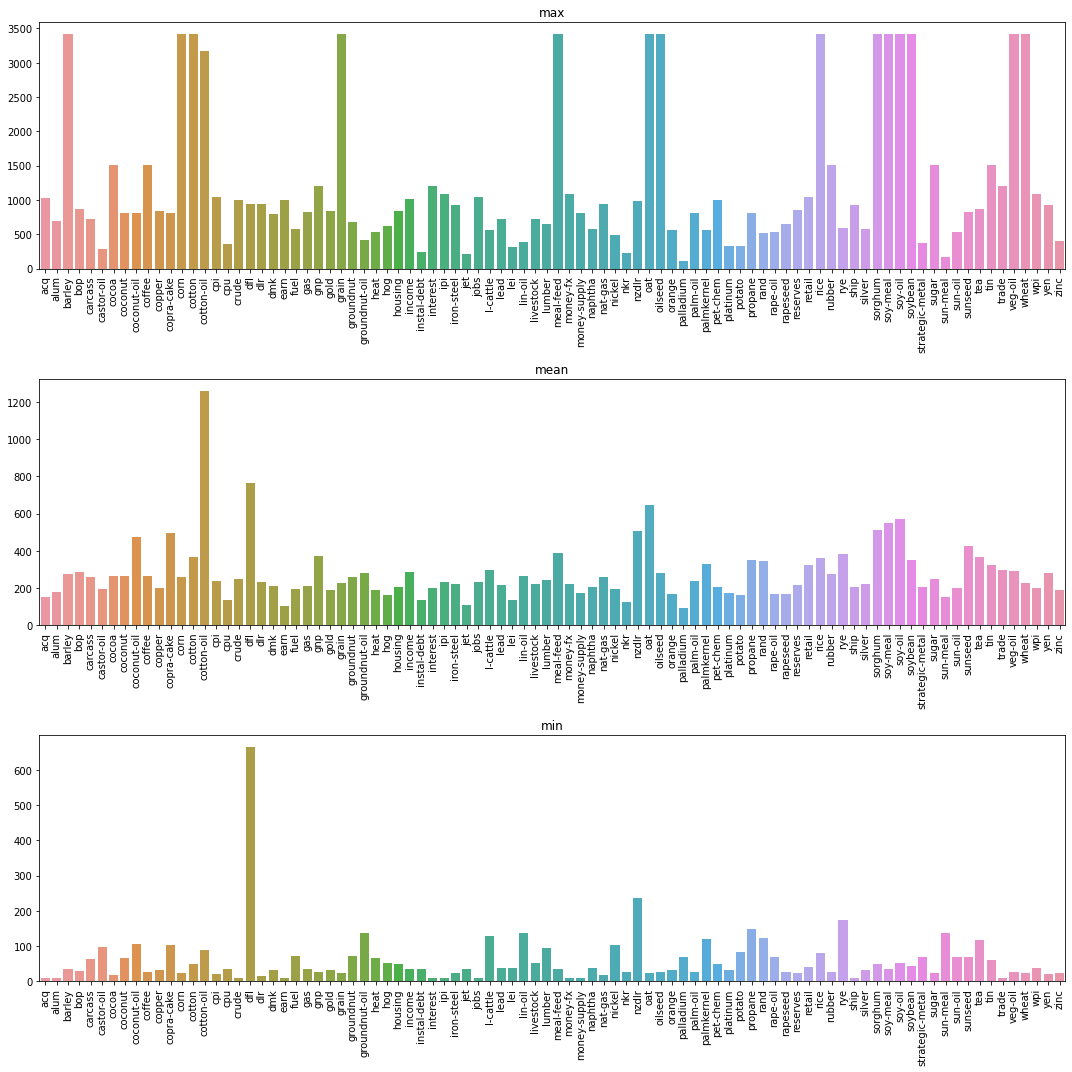

In [17]:
fig = plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
#fig = plt.figure(figsize = (15,5))
ax = sns.barplot(data=articles_length.describe().loc[["max"]])
ax.tick_params(axis='x', rotation=90)
plt.title("max")

plt.subplot(3,1,2)
#fig = plt.figure(figsize = (15,5))
ax = sns.barplot(data=articles_length.describe().loc[["mean"]])
ax.tick_params(axis='x', rotation=90)
plt.title("mean")

plt.subplot(3,1,3)
#fig = plt.figure(figsize = (15,5))
ax = sns.barplot(data=articles_length.describe().loc[["min"]])
ax.tick_params(axis='x', rotation=90)
plt.title("min")

fig.tight_layout() 

plt.show()

Text(0.5, 1.0, 'words_count')

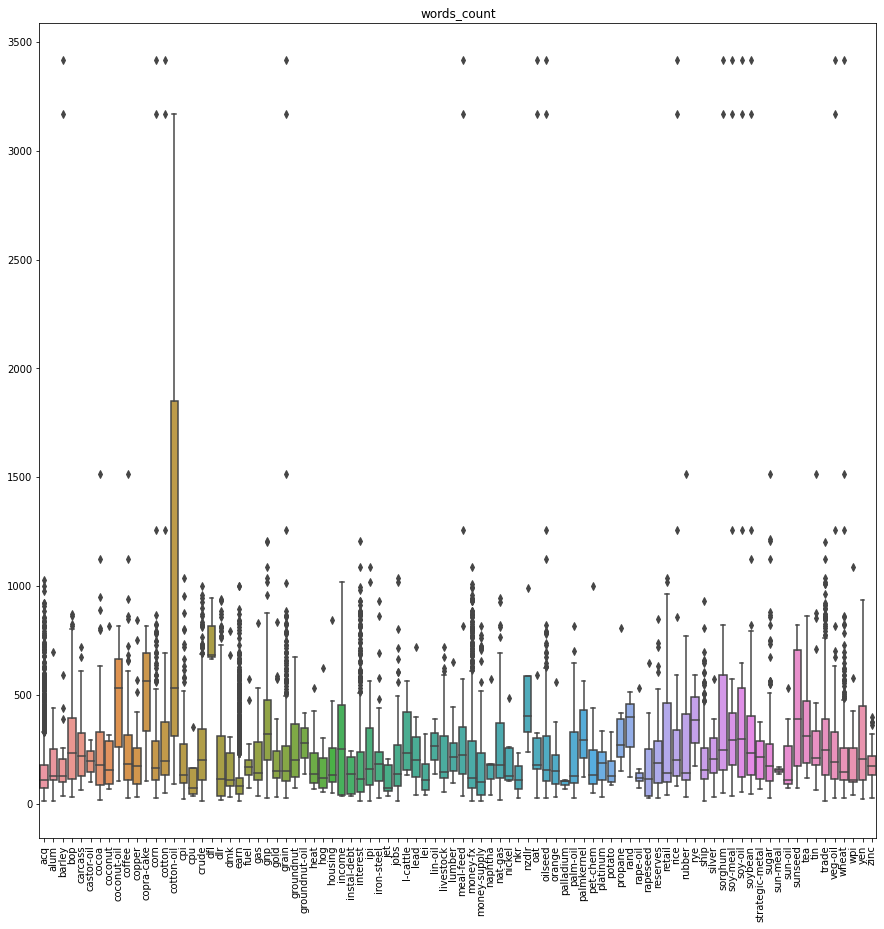

In [18]:
fig = plt.figure(figsize=(15,15))
#fig = plt.figure(figsize = (15,5))
ax = sns.boxplot(data=articles_length)#[["crude"]])
ax.tick_params(axis='x', rotation=90)
plt.title("words_count")

In [19]:
articles_length[["crude"]].describe()

,crude
count,578.000000
mean,247.257785
std,193.651166
min,10.000000
25%,109.000000
50%,198.500000
75%,341.500000
max,999.000000


In [20]:
files_count.loc["crude"]

files_count    578
Name: crude, dtype: int64

In [26]:
words_count = pd.DataFrame(articles_length.sum().astype(int),columns=["words_count"])
words_count.loc["crude"]

words_count    142915
Name: crude, dtype: int64

In [22]:
words = pd.DataFrame()
max_words_count = words_count["words_count"].max()
for category in cat:
    words[category] = pd.Series(reuters.words(categories=category)+list(np.full((max_words_count-words_count.loc[category]),np.nan)))
words

,acq,alum,barley,bop,carcass,castor-oil,cocoa,coconut,coconut-oil,coffee,...,sun-oil,sunseed,tea,tin,trade,veg-oil,wheat,wpi,yen,zinc
0,SUMITOMO,SHOWA,FRENCH,SOUTH,JAPAN,INDIA,COCOA,PHILIPPINE,PHILIPPINE,INDONESIAN,...,RPT,FURTHER,PAKISTAN,THAI,ASIAN,INDONESIA,SRI,YUGOSLAV,BANK,THAI
1,BANK,DENKO,FREE,KOREA,MINISTRY,RELAXES,EXPORTERS,COCONUT,COCONUT,COMMODITY,...,-,ARGENTINE,CONFIRMS,TRADE,EXPORTERS,SEES,LANKA,ECONOMY,OF,ZINC
2,AIMS,EXPORTS,MARKET,MOVES,SAYS,RULES,EXPECTED,CHIEF,CHIEF,EXCHANGE,...,ARGENTINE,COARSE,KENYA,DEFICIT,FEAR,CPO,GETS,WORSENED,JAPAN,EXPORTS
3,AT,ALUMINIUM,CEREAL,TO,OPEN,FOR,TO,TO,TO,MAY,...,GRAIN,GRAIN,TEA,WIDENS,DAMAGE,PRICE,USDA,IN,INTERVENES,FALL
4,QUICK,CASTING,EXPORT,SLOW,FARM,EXPORT,LIMIT,LOBBY,LOBBY,EXPAND,...,/,LOSSES,IMPORT,IN,FROM,RISING,APPROVAL,1986,SOON,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
for category in cat:
    print(category, ": ",words[[category]][(words[category].notna())].duplicated().sum())

acq :  336555
alum :  8152
barley :  12022
bop :  27027
carcass :  14409
castor-oil :  187
cocoa :  16517
coconut :  978
coconut-oil :  2327
coffee :  32223
copper :  10506
copra-cake :  948
corn :  55844
cotton :  18472
cotton-oil :  3121
cpi :  19788
cpu :  365
crude :  132845
dfl :  1615
dlr :  36295
dmk :  2117
earn :  397097
fuel :  3356
gas :  9285
gnp :  46002
gold :  20050
grain :  121270
groundnut :  1472
groundnut-oil :  351
heat :  2721
hog :  2464
housing :  3311
income :  3603
instal-debt :  595
interest :  88091
ipi :  10533
iron-steel :  9570
jet :  261
jobs :  13321
l-cattle :  1514
lead :  4886
lei :  1568
lin-oil :  346
livestock :  18228
lumber :  2727
meal-feed :  16438
money-fx :  148210
money-supply :  26766
naphtha :  730
nat-gas :  23082
nickel :  1092
nkr :  185
nzdlr :  1362
oat :  7746
oilseed :  42590
orange :  3345
palladium :  167
palm-oil :  7456
palmkernel :  571
pet-chem :  4746
platinum :  1365
potato :  581
propane :  1421
rand :  574
rape-oil :  875


Back to the [table of contents](#contents).

## 3. Data cleaning <a name=cleaning></a>
### 1. Raw -> Sents/Words <a name=r_sw></a>

In [98]:
article = reuters.raw(fileids='test/15618')
article

"FRENCH FREE MARKET CEREAL EXPORT BIDS DETAILED\n  French operators have requested licences\n  to export 320,000 tonnes of free market barley, 225,000 tonnes\n  of maize, 25,000 tonnes of free market bread-making wheat and\n  20,000 tonnes of feed wheat at today's EC tender, trade sources\n  said.\n      For the barley, rebates of between 138 and 141.25 European\n  currency units (Ecus) per tonne were sought, for maize they\n  were between 129.65 and 139 Ecus, for bread-making wheat around\n  145 Ecus and for feed wheat around 142.45 Ecus.\n      Barley rebates of up to 138.50 Ecus were requested for a\n  total of 40,000 tonnes and at 139 Ecus for 85,000 tonnes.\n      Rebates of up to 130 Ecus per tonne were requested for a\n  total of 55,000 tonnes maize and up to 131 Ecus for 105,000\n  tonnes, the sources said.\n  \n\n"

In [107]:
pattern = re.compile("\n")
article = re.sub(pattern,"",article)
pattern = re.compile(" +")
article = re.sub(pattern," ",article)
article = article.strip()
#re.findall("(\w[^\.]*\.)",article)
article

"FRENCH FREE MARKET CEREAL EXPORT BIDS DETAILED French operators have requested licences to export 320,000 tonnes of free market barley, 225,000 tonnes of maize, 25,000 tonnes of free market bread-making wheat and 20,000 tonnes of feed wheat at today's EC tender, trade sources said. For the barley, rebates of between 138 and 141.25 European currency units (Ecus) per tonne were sought, for maize they were between 129.65 and 139 Ecus, for bread-making wheat around 145 Ecus and for feed wheat around 142.45 Ecus. Barley rebates of up to 138.50 Ecus were requested for a total of 40,000 tonnes and at 139 Ecus for 85,000 tonnes. Rebates of up to 130 Ecus per tonne were requested for a total of 55,000 tonnes maize and up to 131 Ecus for 105,000 tonnes, the sources said."

In [110]:
nlp = spacy.load('en_core_web_lg')

In [111]:
doc = nlp(article)

In [117]:
for sentence in doc.sents:
    print(sentence)
list(doc.sents)

FRENCH FREE MARKET CEREAL EXPORT BIDS DETAILED French operators have requested licences to export 320,000 tonnes of free market barley, 225,000 tonnes of maize, 25,000 tonnes of free market bread-making wheat and 20,000 tonnes of feed wheat at today's EC tender, trade sources said.
For the barley, rebates of between 138 and 141.25 European currency units (Ecus) per tonne were sought, for maize they were between 129.65 and 139 Ecus, for bread-making wheat around 145 Ecus and for feed wheat around 142.45 Ecus.
Barley rebates of up to 138.50 Ecus were requested for a total of 40,000 tonnes and at 139 Ecus for 85,000 tonnes.
Rebates of up to 130 Ecus per tonne were requested for a total of 55,000 tonnes maize and up to 131 Ecus for 105,000 tonnes, the sources said.


[FRENCH FREE MARKET CEREAL EXPORT BIDS DETAILED French operators have requested licences to export 320,000 tonnes of free market barley, 225,000 tonnes of maize, 25,000 tonnes of free market bread-making wheat and 20,000 tonnes of feed wheat at today's EC tender, trade sources said.,
 For the barley, rebates of between 138 and 141.25 European currency units (Ecus) per tonne were sought, for maize they were between 129.65 and 139 Ecus, for bread-making wheat around 145 Ecus and for feed wheat around 142.45 Ecus.,
 Barley rebates of up to 138.50 Ecus were requested for a total of 40,000 tonnes and at 139 Ecus for 85,000 tonnes.,
 Rebates of up to 130 Ecus per tonne were requested for a total of 55,000 tonnes maize and up to 131 Ecus for 105,000 tonnes, the sources said.]

Back to the [table of contents](#contents).

### 2. Chunking <a name=chunk></a>

In [119]:
displacy.render(doc, style="ent")

Back to the [table of contents](#contents).

## 4. Entities in crude industry <a name=crude_entities></a>

In [3]:
countries = ["United States",
             "Saudi Arabia",
             "Russia",
             "China",
             "Canada",
             "Iraq",
             "Iran",
             "United Arab Emirates",
             "Brazil",
             "Kuwait",
             "Mexico",
             "Venezuela",
             "Norway",
             "Qatar",
             "Nigeria",
             "Angola",
             "Algeria",
             "Kazakhstan",
             "United Kingdom",
             "India"]
# https://www.worldometers.info/oil/oil-production-by-country/
companies = ["Sonatrach",
             "Sonangol Group",
             "Société Nationale des Pétroles du Congo",
             "EGPC & EGAS & GANOPE",
             "Star Africa Commodities & Minerals Limited",
             "Arabian Gulf Oil Company",
             "National Oil Corporation",
             "Madagascar Oil",
             "Aiteo",
             "Lekoil Limited",
             "Nigerian National Petroleum Corporation",
             "SEPLAT Energy",
             "PetroSA",
             "Sasol",
             "Sudapet",
             "Tanzania Petroleum Development Corporation",
             "Entreprise Tunisienne d'Activités Pétrolières",
             "Azerbaijan International Operating Company",
             "SOCAR",
             "Nobel Oil Group",
             "Brunei Shell Petroleum",
             "Bahrain Petroleum Company",
             "Petrobangla",
             "Myanma Oil and Gas Enterprise",
             "CNOOC",
             "China National Petroleum Corporation",
             "CITIC Resources",
             "Geo-Jade Petroleum",
             "Shaanxi Yanchang Petroleum",
             "Sinochem",
             "China Petrochemical Corporation",
             "Southernpec",
             "The Hong Kong and China Gas Company",
             "United Energy Group",
             "Gujarat State Petroleum Corporation",
             "Oil and Natural Gas Corporation",
             "Indian Oil Corporation Limited",
             "Nayara Energy",
             "Reliance Industries",
             "Cairn India",
             "MedcoEnergi",
             "Pertamina",
             "National Iranian Oil Company",
             "North Oil Company",
             "South Oil Company",
             "Missan Oil Company",
             "Midland Oil Company",
             "Delek",
             "Isramco",
             "Modiin Energy",
             "Eneos",
             "Inpex",
             "JAPEX",
             "KazMunayGas",
             "Kuwait Petroleum Corporation",
             "Consolidated Contractors Company",
             "Petronas",
             "Petroleum Development Oman",
             "Oil and Gas Development Company",
             "Pakistan Petroleum",
             "Pakistan Oilfields",
             "Mari Petroleum Company Limited",
             "Petron Corporation",
             "Philippine National Oil Company",
             "Qatar Petroleum",
             "Saudi Aramco",
             "Singapore Petroleum Company",
             "Ceylon Petroleum Corporation",
             "Korea National Oil Corporation",
             "Korea Gas Corporation",
             "CPC Corporation",
             "PTT",
             "Thai Oil",
             "Türkiye Petrolleri Anonim Ortaklığı",
             "Çalık Enerji",
             "Abu Dhabi National Oil Company",
             "Emirates National Oil Company",
             "Uzbekneftegaz",
             "Petrovietnam",
             "Vietsovpetro",
             "OMV",
             "RAG",
             "Petrol AD",
             "INA – Industrija Nafte",
             "Moravské naftové doly",
             "Ørsted A/S",
             "Atlantic Petroleum",
             "Neste",
             "Total S.A.", "Total",
             "Engie",
             "Perenco",
             "Wintershall DEA",
             "Hellenic Petroleum",
             "MOL Group",
             "Maxol",
             "Anonima Petroli Italiana",
             "Edison",
             "Edoardo Raffinerie Garrone",
             "Eni",
             "Saras S.p.A.",
             "Ascom Group",
             "Royal Dutch Shell",
             "Makpetrol",
             "Aker BP",
             "Bayerngas",
             "DNO ASA",
             "Equinor",
             "InterOil",
             "Noreco",
             "Rocksource",
             "Grupa Lotos",
             "PGNiG",
             "PKN Orlen",
             "Galp Energia",
             "Partex Oil and Gas",
             "OMV Petrom",
             "Rompetrol",
             "Bashneft",
             "Gazprom",
             "Itera",
             "Lukoil",
             "Novatek",
             "Rosneft",
             "Rusneftegaz",
             "Russneft",
             "Sakhalin Energy",
             "Surgutneftegas",
             "Tatneft",
             "Naftna Industrija Srbije",
             "Compañía Española de Petróleos",
             "Repsol",
             "Lundin Energy",
             "Naftogaz",
             "BP",
             "Cairn Energy",
             "Centrica",
             "Dana Petroleum",
             "Premier Oil",
             "Regal Petroleum",
             "Tullow Oil",
             "ARC Resources",
             "Baytex Energy",
             "Canadian Natural Resources",
             "Cenovus Energy",
             "Crescent Point Energy",
             "Enbridge",
             "Enerplus",
             "First Calgary Petroleums",
             "Frontera Energy",
             "Imperial Oil",
             "Irving Oil",
             "MEG Energy",
             "Nalcor Energy",
             "Obsidian Energy",
             "Questerre",
             "Ridgeback Resources",
             "Suncor Energy",
             "Syncrude",
             "ShaMaran Petroleum",
             "TC Energy",
             "Vermilion Energy",
             "Cuba Petróleo Union",
             "Uno",
             "Pemex",
             "Petrotrin",
             "Antero Resources",
             "APA Corporation",
             "Berry Petroleum Company",
             "Blacksands Pacific",
             "California Resources Corporation",
             "Chesapeake Energy",
             "Chevron Corporation",
             "CNX Resources",
             "ConocoPhillips",
             "Continental Resources",
             "Coterra",
             "Denbury Inc.",
             "Devon Energy",
             "Diamondback Energy",
             "EOG Resources",
             "EQT",
             "ExxonMobil", "Exxon",
             "Greka Energy",
             "Hess Corporation",
             "HKN, Inc.",
             "Koch Industries",
             "Laredo Petroleum",
             "Marathon Oil",
             "Murphy Oil",
             "Oasis Petroleum",
             "Occidental Petroleum",
             "Ovintiv",
             "Pioneer Natural Resources",
             "Range Resources",
             "SandRidge Energy",
             "Shell Oil Company",
             "SM Energy",
             "Southwestern Energy",
             "Vaalco Energy",
             "Whiting Petroleum Corporation",
             "XTO Energy",
             "Australian Worldwide Exploration", "AWE",
             "BHP",
             "Origin Energy",
             "Santos Limited",
             "Woodside Petroleum",
             "Todd Corporation",
             "Oil Search",
             "Bridas Corporation",
             "YPF",
             "YPFB",
             "Petrobras",
             "Empresa Nacional del Petróleo",
             "Empresas Copec",
             "Ecopetrol",
             "Petroecuador",
             "Petropar",
             "Petroperú",
             "ANCAP",
             "PDVSA"]

In [91]:
import spacy

In [92]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
doc = nlp

Back to the [table of contents](#contents).